# Whelks and lobsters -- context operator

## The system

In [1]:
R.<x,y> = QQ[]

In [2]:
from lbuc import *

In [3]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

In [4]:
v3 = [RIF(1,1.1), RIF(4,5)]

In [5]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Simple signal

In [6]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

Computed 501 flowpipes in 3.50751805305 sec
Prepared for plotting in 1.94247078896 sec
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[1.6679767143790413 .. 1.6700000000000015], 
 [1.6741848470338667 .. 2.3200000000000092]]
  J  = [0.00000000000000000 .. 1.6679767143790414]
f(J) = [-0.000013361748243909469 .. 24.810000000000010]
  J  = [1.6700000000000014 .. 1.6741848470338668]
f(J) = [-0.0030347699162351187 .. 0.50079420254075380]
  J  = [2.3200000000000091 .. 5.0000000000000009]
f(J) = [-0.19790309605503754 .. 0.00074757056277772333]
Monitored signal 5.42210435867 sec


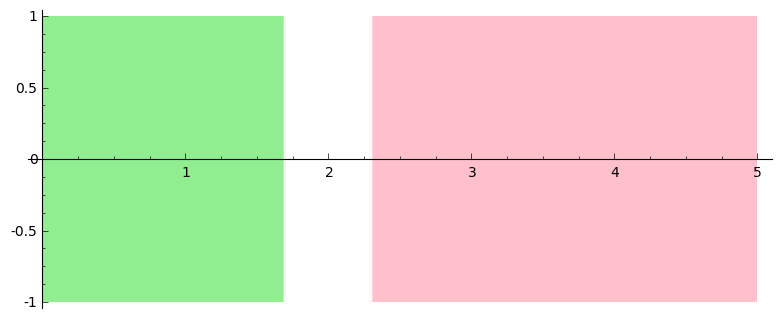

In [7]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
sig.plot()

Computed 501 flowpipes in 3.45822691917 sec
Prepared for plotting in 1.82816672325 sec
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[1.6679767143790413 .. 1.6700000000000015], 
 [1.6741848470338667 .. 2.3200000000000092]]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
  J  = [0.00000000000000000 .. 1.6679767143790414]
f(J) = [-0.000013361748243909469 .. 24.810000000000010]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
  J  = [1.6700000000000014 .. 1.6741848470338668]
f(J) = [-0.0030347699162351187 .. 0.50079420254075380]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
  J  = [2.3200000000000091 .. 5

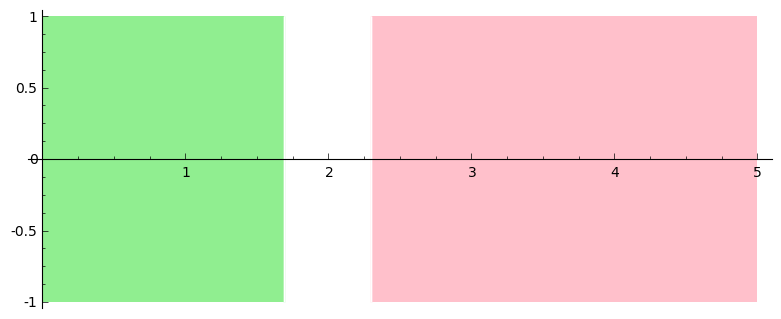

In [9]:
csig = P.context_signal_for_system(vf, v3, 5, order=5, step=0.01,
                           precondition=1,
                           estimation=1e-3,
                           integrationScheme=2,
                           cutoff_threshold=1e-5,
                           symbolic_composition=True)
csig.signal.plot()

In [10]:
sig = csig.refined_signal(1)

(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[2.0296093990124832 .. 2.0300000000000025], 
 [2.0329094479094744 .. 2.3137968369855391]]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
  J  = [0.00000000000000000 .. 2.0296093990124833]
f(J) = [-0.000010495390215623825 .. 20.305000000000007]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
  J  = [2.0300000000000024 .. 2.0329094479094745]
f(J) = [-0.00022175062241133661 .. 0.13668819913828304]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
  J  = [2.3137968369855390 .. 5.0000000000000000]
f(J) = [-0.19630378226473789 .. 7.1207871426185550e-6]
(1.000000000

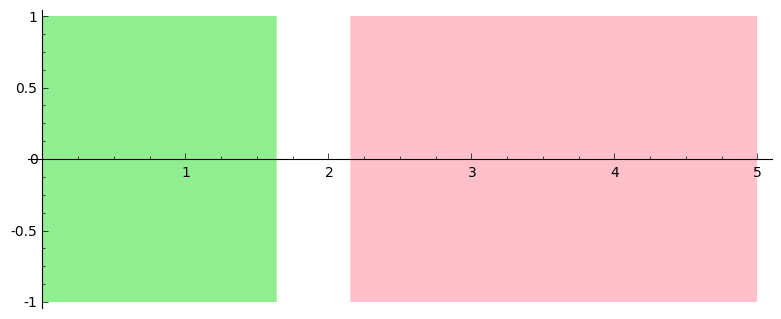

In [11]:
sig.plot()

In [12]:
sig = csig.refined_signal(2)

(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[2.1645867424177569 .. 2.3123994398380528]]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
  J  = [0.00000000000000000 .. 2.1645867424177570]
f(J) = [0.000041749769527104144 .. 18.052500000000010]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
  J  = [2.3123994398380527 .. 5.0000000000000009]
f(J) = [-0.19550808410235793 .. 5.9785996867813690e-6]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.02499999999999, 1.05000000000001)
(4.00000000000000, 4.25000000000000)
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[2.0575913551794364 .. 2.1945940806057838]]
(1.02499999999999, 1.05000000000001)
(4.00000000000000, 4.2

  J  = [2.2477712999914385 .. 2.3999999999999165]
f(J) = [-0.087147566282983591 .. 7.4768295689562476e-7]
(1.00000000000000, 1.02500000000000)
(4.75000000000000, 5.00000000000000)
(1.00000000000000, 1.02500000000000)
(4.75000000000000, 5.00000000000000)
(1.00000000000000, 1.02500000000000)
(4.75000000000000, 5.00000000000000)
  J  = [2.4100000000000112 .. 5.0000000000000009]
f(J) = [-0.19615957550334820 .. -0.050052095071923846]
(1.00000000000000, 1.02500000000000)
(4.75000000000000, 5.00000000000000)
(1.02499999999999, 1.05000000000001)
(4.75000000000000, 5.00000000000000)
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[1.9875789374408641 .. 2.1339907184839842], 
 [2.1399999999999335 .. 2.1500000000000053]]
(1.02499999999999, 1.05000000000001)
(4.75000000000000, 5.00000000000000)
  J  = [0.00000000000000000 .. 1.9875789374408642]
f(J) = [-0.000012215041893988595 .. 24.803125000000009]
(1.02499999999999, 1.05000000000001)
(4.75000000000000, 5.00000000000000)
(1.024999999

limit_output extension: Maximum message size of 10000 exceeded with 10888 characters

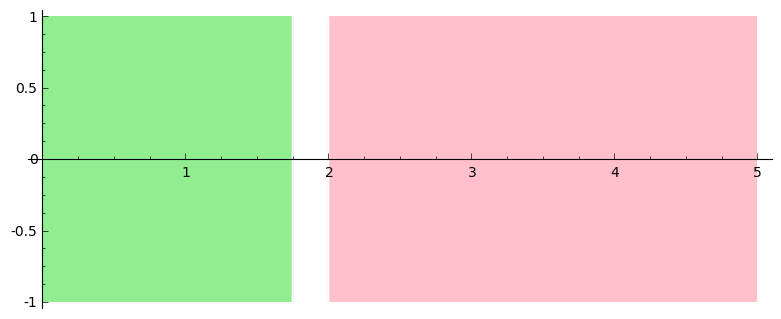

In [13]:
sig.plot()

Computed 66 flowpipes in 0.553800106049 sec
Prepared for plotting in 0.313583612442 sec
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[0.20869720197607338 .. 1.0667769404094772], 
 [1.9288779733489953 .. 1.9644973600715692], 
 [1.9992853399160006 .. 2.5226104823220937]]
  J  = [0.00000000000000000 .. 0.20869720197607339]
f(J) = [-0.18999999999999998 .. -3.6719473392602189e-6]
  J  = [1.0667769404094771 .. 1.9288779733489954]
f(J) = [-0.0017478170514452065 .. 0.18483511657633023]
  J  = [1.9644973600715691 .. 1.9992853399160007]
f(J) = [-0.0054311760130603352 .. 0.079075072287556059]
  J  = [2.5226104823220936 .. 5.0000000000000000]
f(J) = [-0.15119669081481027 .. 0.0024595488683232733]
Monitored signal 0.0623822212219 sec


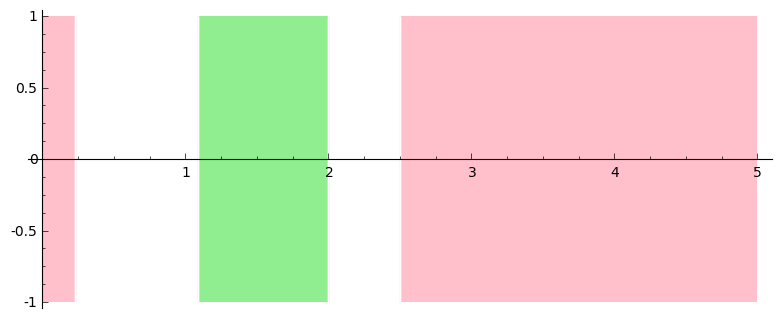

In [14]:
sig2 = Atomic(x - 1.19).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

Computed 66 flowpipes in 0.554594039917 sec
Prepared for plotting in 0.350083827972 sec
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[0.23252626456277217 .. 1.1287421473302389], 
 [1.1523668128863000 .. 1.1628230111366578], 
 [1.6603011858793388 .. 1.6719033445819920], 
 [1.7271462209094443 .. 2.4183927507172496]]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
  J  = [0.00000000000000000 .. 0.23252626456277218]
f(J) = [-0.19999999999999999 .. -1.7566307494529947e-6]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
  J  = [1.1287421473302388 .. 1.1523668128863001]
f(J) = [-0.0075534512803621069 .. 0.17276767635149815]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
  J  = [1.

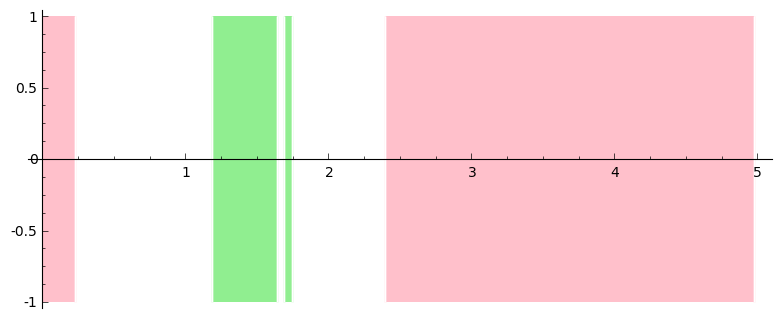

In [15]:
csig2 = Atomic(x - 1.2).context_signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
csig2.signal.plot()

(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[0.48101146191823490 .. 1.1287421473302389], 
 [1.8150821032146706 .. 2.2496393559144586]]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
  J  = [0.00000000000000000 .. 0.48101146191823491]
f(J) = [-0.19999999999999999 .. 0.0035908710618124938]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
  J  = [1.1287421473302388 .. 1.8150821032146707]
f(J) = [-0.0014476364959868790 .. 0.091345730396259873]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
  J  = [2.2496393559144585 .. 5.0000000000000000]
f(J) = [-0.15809585935782817 .. 0.000012470438455329005]
(1.000000

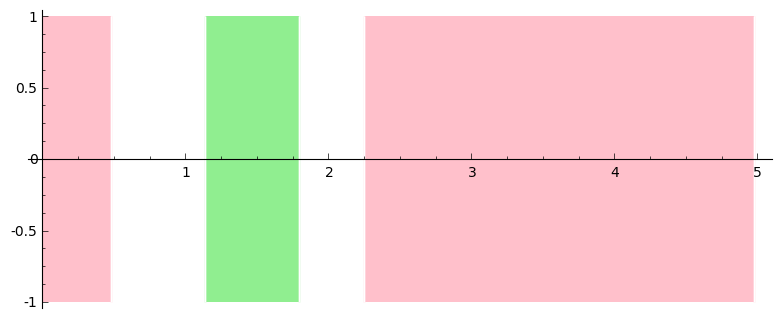

In [16]:
csig2.refined_signal(1).plot()

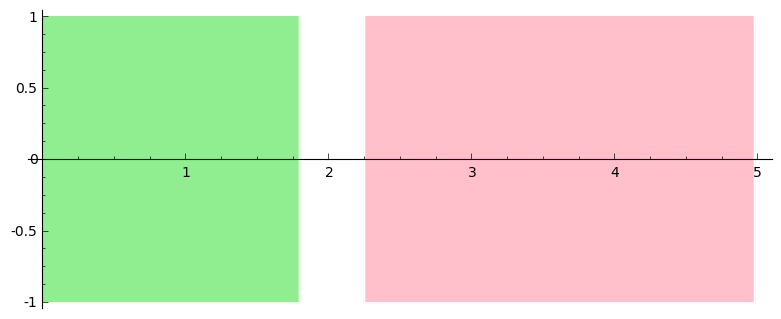

In [17]:
(csig.refined_signal(1) | csig2.refined_signal(1)).plot()

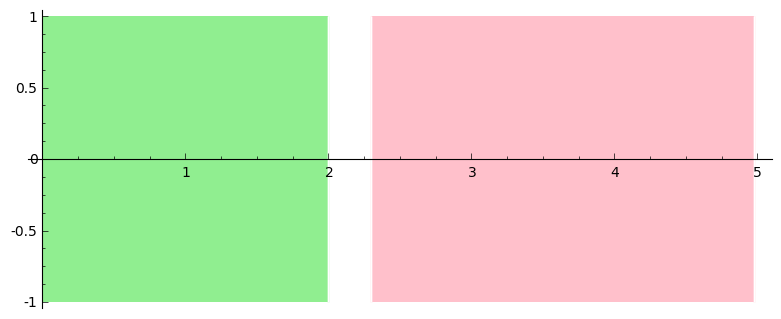

In [18]:
(csig | csig2).refined_signal(1).plot()

In [19]:
sig = (csig.refined_signal(2) | csig2.refined_signal(2))

(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[0.66837608349660437 .. 1.0955580513874530], 
 [1.8331281569570301 .. 2.1388810122789095]]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
  J  = [0.00000000000000000 .. 0.66837608349660438]
f(J) = [-0.19999999999999999 .. -0.00099298130660650948]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
  J  = [1.0955580513874529 .. 1.8331281569570302]
f(J) = [-0.00011526850836946304 .. 0.051220236747116212]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
  J  = [2.1388810122789094 .. 5.0000000000000000]
f(J) = [-0.15646994505456547 .. -2.7538337796935950e-6]
(1.0000

f(J) = [-0.000065630104821849667 .. 0.13093883917508029]
(1.07500000000000, 1.10000000000001)
(4.25000000000000, 4.50000000000000)
(1.07500000000000, 1.10000000000001)
(4.25000000000000, 4.50000000000000)
(1.07500000000000, 1.10000000000001)
(4.25000000000000, 4.50000000000000)
  J  = [2.2810124103521967 .. 5.0000000000000000]
f(J) = [-0.15945989660917468 .. 0.000043865897366773474]
(1.07500000000000, 1.10000000000001)
(4.25000000000000, 4.50000000000000)
(1.00000000000000, 1.02500000000000)
(4.50000000000000, 4.75000000000000)
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[0.56631196857860399 .. 0.81337576719956939], 
 [2.1904860010211706 .. 2.3236493583492095]]
(1.00000000000000, 1.02500000000000)
(4.50000000000000, 4.75000000000000)
  J  = [0.00000000000000000 .. 0.56631196857860400]
f(J) = [-0.19999999999999999 .. 0.000030416740633299605]
(1.00000000000000, 1.02500000000000)
(4.50000000000000, 4.75000000000000)
(1.00000000000000, 1.02500000000000)
(4.50000000000000,

limit_output extension: Maximum message size of 10000 exceeded with 13259 characters

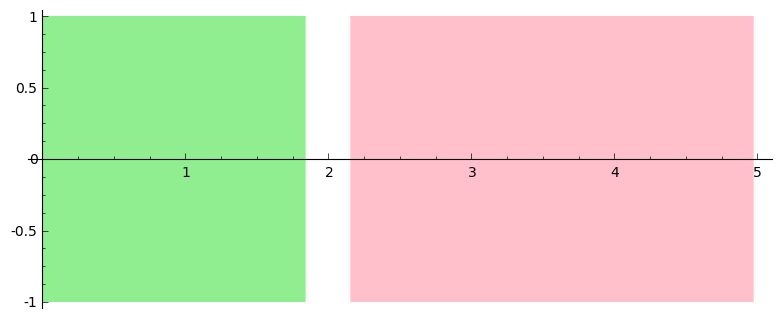

In [20]:
sig.plot()

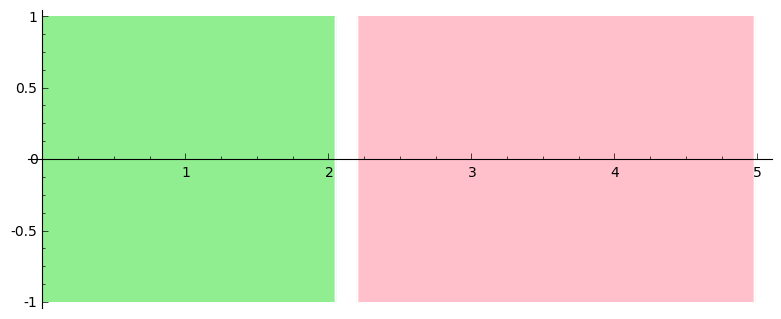

In [21]:
(csig | csig2).refined_signal(2).plot()

## Polynomial plot

In [22]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7,
              symbolic_composition=True)

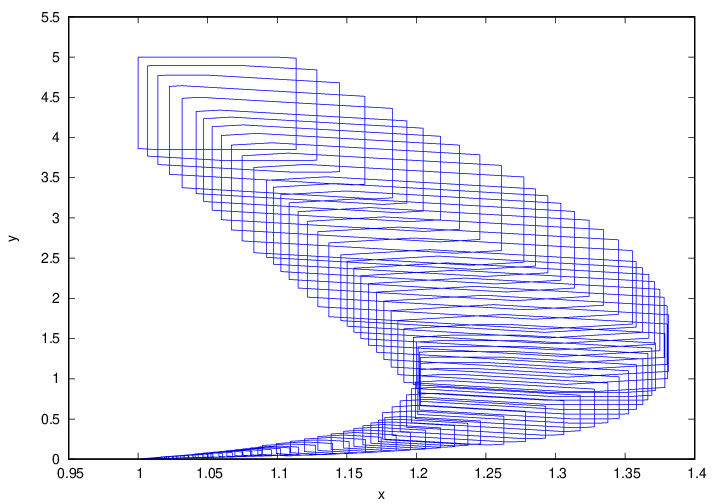

In [23]:
reach.wplot('x', 'y')

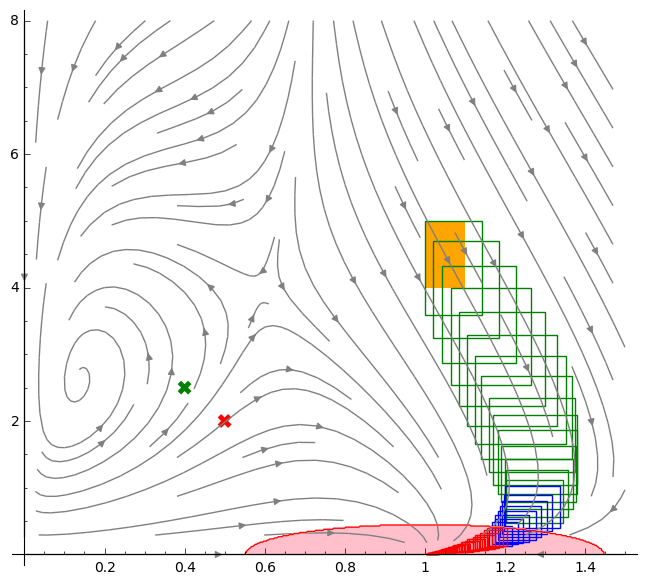

In [24]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

## Context

In [25]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
    symbolic_composition=True,
)
args = (vf, v3, 7)

In [26]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

C({x: [0.050000000000000002 .. 0.10000000000000001]}, G([0.00000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)))

In [27]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

Computed 95 flowpipes in 0.633952856064 sec
Prepared for plotting in 0.348729848862 sec
Computed 11 flowpipes in 0.123661994934 sec
Prepared for plotting in 0.0620999336243 sec
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = []
  J  = [0.00000000000000000 .. 0.20100000000000004]
f(J) = [0.65692812208000928 .. 25.065771944921185]
Monitored signal 0.14554309845 sec
Computed 11 flowpipes in 0.122849941254 sec
Prepared for plotting in 0.0676646232605 sec
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = []
0 at 0.201000000000001
Monitored signal 0.0184020996094 sec
Computed 10 flowpipes in 0.115880012512 sec
Prepared for plotting in 0.0559148788452 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = []
  J  = [0.00000000000000000 .. 0.20100000000000002]
f(J) = [0.72209370943192241 .. 15.508351455905079]
Monitored signal 0.122677087784 sec
Computed 9 flowpipes in 0.10232591629 sec
Prepared for plotting in 0.0486078262329 sec
domain = [0.00000000000000

domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.0315141677856 sec
Computed 3 flowpipes in 0.0404651165009 sec
Prepared for plotting in 0.00655484199524 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.0306057929993 sec
Computed 3 flowpipes in 0.0397500991821 sec
Prepared for plotting in 0.0061206817627 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.0312421321869 sec
Computed 3 flowpipes in 0.0424041748047 sec
Prepared for plotting in 0.00648260116577 sec
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.0312819480896 sec
Computed 3 flowpipes in 0.0402500629425 sec
Prepared fo

limit_output extension: Maximum message size of 10000 exceeded with 11669 characters

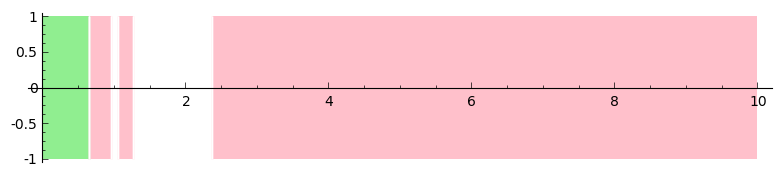

In [28]:
sig.plot()

### Context $\rightarrow$ Context Signal

In [29]:
ctx_sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
           ).context_signal_for_system(vf, v3, 10, **kwargs)
ctx_sig

Computed 95 flowpipes in 0.686033964157 sec
Prepared for plotting in 0.366817951202 sec


ContextSignal([0.00000000000000000 .. 10.001000000000002], {'x': [1.0000000000000000 .. 1.1000000000000001], 'y': [4 .. 5]}, <flowstar.reachability.Reach object at 0x55e868af0800>, <function signal_fn at 0x7f43c149bf50>)

In [30]:
sig = ctx_sig.signal

(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
Computed 11 flowpipes in 0.125112056732 sec
Prepared for plotting in 0.0638597011566 sec
(1.04999881254551, 1.33301105691821)
(2.83264165910782, 5.00000878592864)
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = []
(1.04999881254551, 1.33301105691821)
(2.83264165910782, 5.00000878592864)
(1.04999881254551, 1.33301105691821)
(2.83264165910782, 5.00000878592864)
  J  = [0.00000000000000000 .. 0.20100000000000004]
f(J) = [0.65692812208000928 .. 25.065771944921185]
(1.04999881254551, 1.33301105691821)
(2.83264165910782, 5.00000878592864)
(1.

Computed 6 flowpipes in 0.0691459178925 sec
Prepared for plotting in 0.0268068313599 sec
(1.23395470100337, 1.46579390733673)
(0.243436123682240, 1.33934524849783)
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
(1.23395470100337, 1.46579390733673)
(0.243436123682240, 1.33934524849783)
0 at 0.201000000000001
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
Computed 6 flowpipes in 0.0821850299835 sec
Prepared for plotting in 0.0224397182465 sec
(1.24741644962484, 1.46579390733673)
(0.417066958097729, 1.33934524849783)
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
(1.24741644962484, 1.46579390733673)
(0.417066958097729, 1.33934524849783)
0 at 0.201000000000001
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
Computed 6 flowpipes in 0.0849320888519 sec
Prepared for plotting in 0.0225868225098 sec
(1.24912394079984, 1.

limit_output extension: Maximum message size of 10000 exceeded with 10800 characters

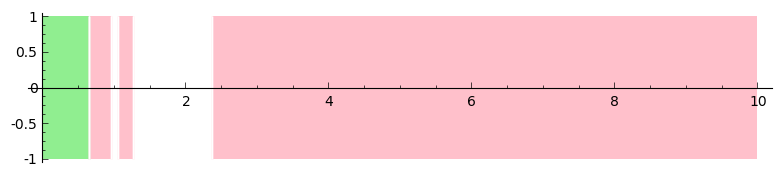

In [31]:
sig.plot()

In [34]:
sig = ctx_sig.refined_signal(1)

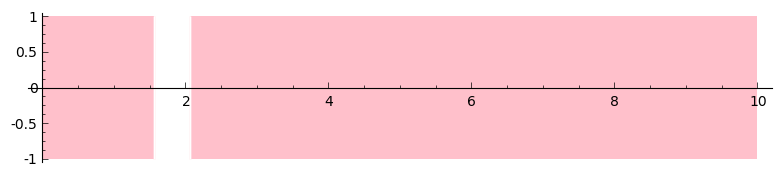

In [35]:
sig.plot()

In [36]:
ctx_sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
           ).context_signal_for_system(vf, v3, 10, refine=1, **kwargs)
ctx_sig

Computed 95 flowpipes in 0.707628011703 sec
Prepared for plotting in 0.389276742935 sec


ContextSignal([0.00000000000000000 .. 10.001000000000002], {'x': [1.0000000000000000 .. 1.1000000000000001], 'y': [4 .. 5]}, <flowstar.reachability.Reach object at 0x55e86812e6e0>, <function signal_fn at 0x7f43c55dbf50>)

In [37]:
sig = ctx_sig.signal

(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
Computed 11 flowpipes in 0.123155117035 sec
Prepared for plotting in 0.0621297359467 sec
(1.04999881254551, 1.19150493473187)
(2.83264165910782, 3.91632522251824)
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = []
(1.04999881254551, 1.19150493473187)
(2.83264165910782, 3.91632522251824)
(1.04999881254551, 1.19150493473187)
(2.83264165910782, 3.91632522251824)
  J  = [0.00000000000000000 .. 0.20100000000000002]
f(J) = [2.8978969267277330 .. 16.395811007358635]
(1.04999881254551, 1.19150493473187)
(2.83264165910782, 3.91632522251824)
(1.1

(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
Computed 11 flowpipes in 0.136569023132 sec
Prepared for plotting in 0.0714457035065 sec
(1.17904225739546, 1.33117939482155)
(0.724319096642244, 1.80007174419268)
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.095392187499999961 .. 0.20199999999900001]]
(1.17904225739546, 1.33117939482155)
(0.724319096642244, 1.80007174419268)
  J  = [0.00000000000000000 .. 0.095392187499999962]
f(J) = [-1.1590187813585416 .. 4.4584268532146912]
(1.17904225739546, 1.33117939482155)
(0.724319096642244, 1.80007174419268)
(1.17904225739546, 1.33117939482155)
(0.724319096642244, 1.80007174419268)
0 at 0.201000000000001
(1.33117939482154, 1.48331653224763)
(0.724319096642244, 1.80007174419268)
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.095392187499999961 .. 0.20199999999900001]]
(1.33117939482154, 1.48331653224763)
(0.724319096642244, 1.80007174419268)
  J  = [0.00000000000000000 .. 0.0953921

limit_output extension: Maximum message size of 10000 exceeded with 10814 characters

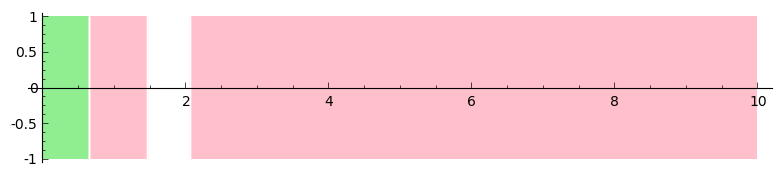

In [38]:
sig.plot()

In [39]:
sig = ctx_sig.refined_signal(1)

(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
Computed 14 flowpipes in 0.156180143356 sec
Prepared for plotting in 0.105596780777 sec
(1.04999881254551, 1.22127819050770)
(1.01256877585807, 2.75628878089336)
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = []
(1.04999881254551, 1.22127819050770)
(1.01256877585807, 2.75628878089336)
0 at 0.201000000000001
(1.22127819050769, 1.39255756846988)
(1.01256877585807, 2.75628878089336)
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = [[0.16076894219531237 .. 0.20199999999900001]]
(1.22127819050769, 1.39255756846988)
(1.01256877585807, 2.75628878089336)
  J  = [0.00000000000000000 .. 0.16076894219531238]
f(J) = [-3.0974282041869206 .. 10.893881602573546]
(1.22127819050769, 1

domain = [0.00000000000000000 .. 0.20100000000000002]
roots = []
(1.31826270430686, 1.38317518732711)
(0.661874030118278, 0.880633254711910)
(1.31826270430686, 1.38317518732711)
(0.661874030118278, 0.880633254711910)
  J  = [0.00000000000000000 .. 0.20100000000000002]


limit_output extension: Maximum message size of 10000 exceeded with 11796 characters

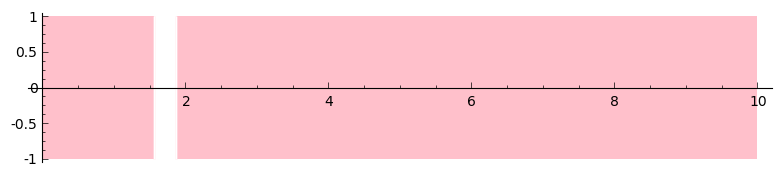

In [40]:
sig.plot()

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
          ).context_signal_for_system(vf, v3, 10, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.signal
sig

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
          ).context_signal_for_system(vf, v3, 10, refine=1, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()